# Student Marks prediction project

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
# Dataset loading
path = r"C:\Users\Tharuni\Desktop\NIT\sept month\16th,17th_ML Project\student_mark_prediction_project\data\student_info.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
df.shape

(200, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


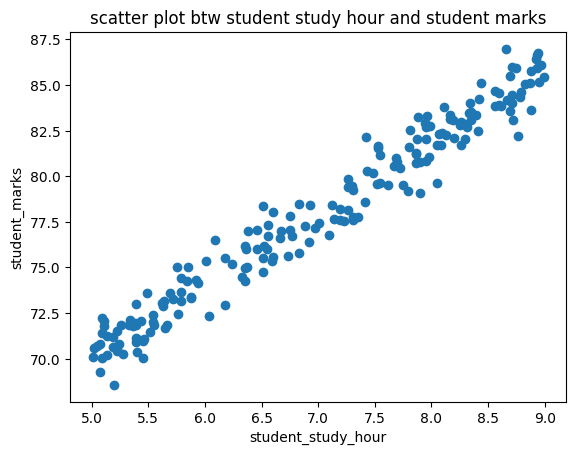

In [9]:
# visualisation 
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel('student_study_hour')
plt.ylabel('student_marks')
plt.title('scatter plot btw student study hour and student marks')
plt.show()

# Data preprocessing

In [10]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [11]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [12]:
df2 = df.fillna(df.mean())

In [13]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [14]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [15]:
# split the data for training and testing
x = df2.drop("student_marks",axis='columns')
y = df2.drop("study_hours",axis='columns')
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (200, 1)
shape of y (200, 1)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print("shape of x_train",x_train.shape)
print("sxhape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("sxhape of y_test",y_test.shape)


shape of x_train (150, 1)
sxhape of x_test (50, 1)
shape of y_train (150, 1)
sxhape of y_test (50, 1)


In [17]:
# model selection and training
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
lr.coef_ # getting coefficient

array([[3.94429706]])

In [20]:
lr.intercept_ # getting intercept 

array([50.3945769])

In [21]:
m = 3.93
c = 50.44
y = m * 4 + c
y

66.16

In [22]:
lr.predict([[4]])[0][0].round(2)

c:\Users\Tharuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(66.17)

In [23]:
y_pred = lr.predict(x_test)
y_pred

array([[71.65433808],
       [71.22046541],
       [84.78884731],
       [82.97447066],
       [70.98380758],
       [76.42693753],
       [74.41534603],
       [84.59163246],
       [79.89791895],
       [81.75173857],
       [78.7540728 ],
       [83.56611522],
       [84.15775978],
       [85.0649481 ],
       [81.87006748],
       [72.8376272 ],
       [81.39675183],
       [78.39908606],
       [82.58004095],
       [72.67985532],
       [79.22738845],
       [75.48030624],
       [82.30394016],
       [80.72622133],
       [77.9886769 ],
       [81.12065104],
       [72.56152641],
       [73.82370147],
       [80.17401974],
       [76.93969615],
       [70.1555052 ],
       [71.61489511],
       [75.44086327],
       [73.23205691],
       [85.61714969],
       [70.90492164],
       [71.65433808],
       [79.62181815],
       [82.93502769],
       [79.38516033],
       [73.42927176],
       [72.95595611],
       [79.03017359],
       [82.69836986],
       [73.07428503],
       [80

In [25]:
pd.DataFrame(np.c_[x_test,y_test,y_pred], columns=["student_study_hours","original_marks","predicted_marks"])

,student_study_hours,original_marks,predicted_marks
0,5.390000,70.90,71.654338
1,5.280000,70.27,71.220465
2,8.720000,83.08,84.788847
3,8.260000,82.99,82.974471
4,5.220000,71.50,70.983808
5,6.600000,78.05,76.426938
6,6.090000,76.48,74.415346
7,8.670000,84.19,84.591632
8,7.480000,80.17,79.897919
9,7.950000,82.68,81.751739


# Fine tune the model

In [27]:
lr.score(x_test,y_test)

0.9400249252148889

In [28]:
lr.score(x_train,y_train)

0.962346740100559

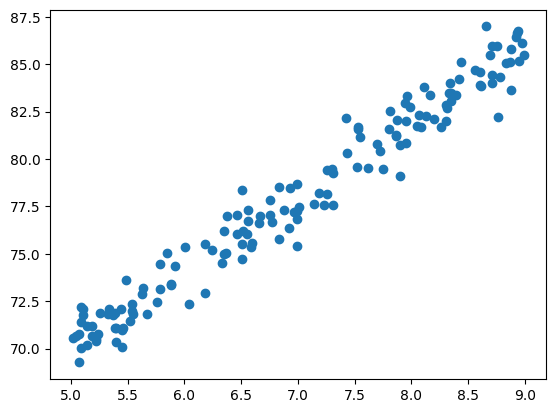

In [29]:
plt.scatter(x_train,y_train)

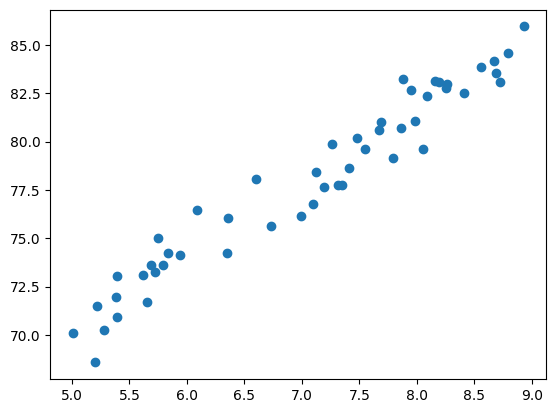

In [30]:
plt.scatter(x_test,y_test)

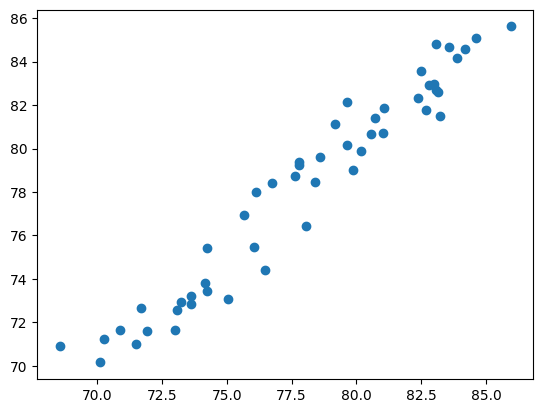

In [31]:
plt.scatter(y_test,y_pred)

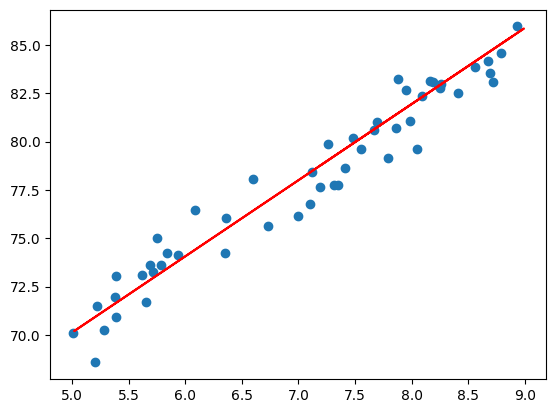

In [32]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color = "r")

# save the ml model

In [33]:
import joblib
joblib.dump(lr,"student_mark_prediction.pkl")

['student_mark_prediction.pkl']

In [34]:
model = joblib.load("student_mark_prediction.pkl")

In [35]:
model.predict([[5]])[0][0]

c:\Users\Tharuni\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(70.11606222745901)